In [40]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


from sklearn.cluster import MiniBatchKMeans
# See: https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
df = pd.read_csv('../data/csv/jobs.csv')

In [3]:
df.shape

(150669, 5)

In [4]:
df.columns

Index(['Unnamed: 0', 'title', 'company', 'location', 'description'], dtype='object')

In [49]:
df['company'] = df['company'].str.strip()
df['title'] = df['title'].str.strip()
df['location'] = df['location'].str.strip()
df.to_csv('large_all_listgs.csv')

In [35]:
df['company'].value_counts()[:40]

JPMorgan                            10832
Citigroup                            7762
Morgan Stanley                       4042
Bank of America                      3554
BMO Financial Group                  3382
RBC Financial Group                  2849
Credit Suisse                        2380
Goldman Sachs                        1868
Pearson                              1801
Gannett                              1643
Maurices                             1572
HSBC                                 1522
Turner Broadcasting                  1389
Time Warner Cable                    1385
Adidas                               1377
TD Securities                        1369
CBS                                  1310
iHeartMedia                          1295
Bloomberg                            1211
Adidas Group                         1083
Delhaize America                      934
SunTrust                              929
BBC                                   881
Comcast                           

In [42]:
import spacy
nlp = spacy.load("en_core_web_lg")

ModuleNotFoundError: No module named 'spacy'

In [10]:
vectorizer = TfidfVectorizer(stop_words='english', 
                             min_df=30, 
                             max_df=.5,
                             max_features=500)

In [42]:
# import sklearn.feature_extraction.text as skt

# #dir(skt)
# skt.ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [24]:
tfidf_vectors = vectorizer.fit_transform(df['description'].values.astype('U'))

In [13]:
vectorizer.get_feature_names()[0:100]

['10',
 'abilities',
 'able',
 'access',
 'accordance',
 'account',
 'accounting',
 'accounts',
 'accurate',
 'achieve',
 'act',
 'action',
 'actively',
 'activities',
 'ad',
 'additional',
 'administration',
 'administrative',
 'advanced',
 'age',
 'america',
 'analysis',
 'analytical',
 'analytics',
 'analyze',
 'annual',
 'applicable',
 'applicants',
 'application',
 'applications',
 'apply',
 'approach',
 'appropriate',
 'area',
 'areas',
 'aspects',
 'asset',
 'assets',
 'assigned',
 'assist',
 'assistant',
 'associate',
 'associates',
 'attention',
 'audit',
 'available',
 'bachelor',
 'background',
 'bank',
 'banking',
 'based',
 'basic',
 'basis',
 'benefits',
 'best',
 'branch',
 'brand',
 'brands',
 'budget',
 'build',
 'building',
 'businesses',
 'candidate',
 'candidates',
 'capital',
 'care',
 'career',
 'cash',
 'center',
 'change',
 'changes',
 'chase',
 'class',
 'client',
 'clients',
 'clinical',
 'closely',
 'coaching',
 'college',
 'color',
 'com',
 'commercial',
 'c

In [17]:
# Helpers for finding the row a string appears
# search = df['description'].str.contains('0571')
# search[search == True]
# df.iloc[26806]['description']

### Build K Means on TF-IDF Vector

##### Some working notes
- Is SSE a good measure in this case?
    - https://upcommons.upc.edu/bitstream/handle/2117/23414/R13-8.pdf
        - > "From the experiments, a first conclusion is that to use the sum of square euclidean distances to the centroids to compare the quality of partitions from k-means and mini batch k-means as proposed in [11] is not adequate."
    - We really care more about label accuracy than centroid distance
- Quality difference between kmeans and kmeans minibatch
- tokenizer/lemmatization
- GloVe

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters


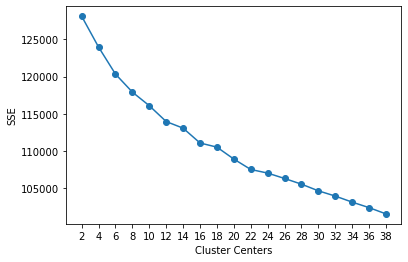

In [41]:
def parameter_search_k_means_sse(vectors, max_k=40):
    """
        Iterate k from 2 to max_k by 2 and measure SSE. 
    """    
    iters = range(2, max_k, 2)

    sse = []
    for k in iters:
        sse.append(
            MiniBatchKMeans(n_clusters=k, 
                            init_size=1024, 
                            batch_size=2048).fit(vectors).inertia_)
        
        print('Fit {} clusters'.format(k))

    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')

parameter_search_k_means_sse(tfidf_vectors)

In [ ]:
def build_test_set():
    companies = df.groupby(by='company')
    companies.get_group('Goldman Sachs')

def cross_validate(vectors, max_k=40):
    from sklearn.model_selection import cross_val_score
    
    
    
    MiniBatchKMeans(n_clusters=k, 
                            init_size=1024, 
                            batch_size=2048).fit(vectors).inertia_)
    
    scores = cross_val_score(clf, X, y, cv=5)

In [28]:
# Pick a cluster number and fit the matrix
clusters = MiniBatchKMeans(n_clusters=36, init_size=1024, batch_size=2048, random_state=20).fit_predict(tfidf_vectors)

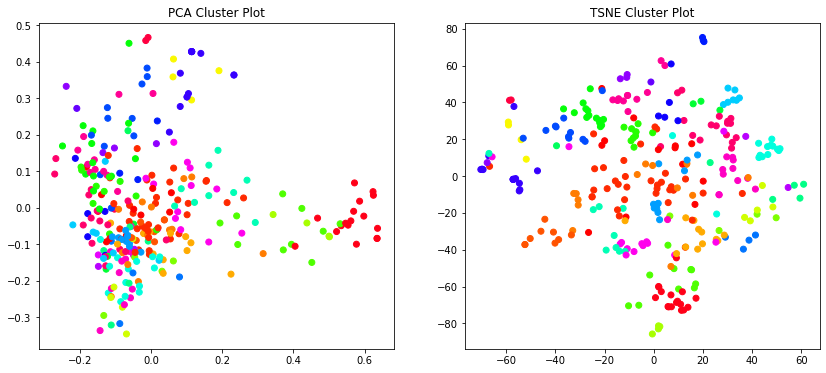

In [30]:
def plot_tsne_pca(vectors, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(vectors.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(vectors[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(vectors[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(tfidf_vectors, clusters)

In [34]:
def get_top_keywords(vectors, clusters, labels, n_terms):
    df = pd.DataFrame(vectors.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(tfidf_vectors, clusters, vectorizer.get_feature_names(), 10)


Cluster 0
process,teams,leadership,develop,key,research,global,strategy,development,strategic

Cluster 1
administrative,equipment,position,time,office,able,duties,customer,job,service

Cluster 2
quality,director,services,staff,state,medical,clinical,health,patient,care

Cluster 3
disability,religion,color,national,origin,race,employment,gender,protected,status

Cluster 4
market,products,retail,marketing,sales,development,brand,fashion,merchandising,product

Cluster 5
value,plan,offer,company,ll,associate,safety,great,store,associates

Cluster 6
financial,regulatory,help,transactions,chase,ll,customer,customers,banking,branch

Cluster 7
online,entertainment,social,mobile,million,sales,marketing,content,media,digital

Cluster 8
assist,fashion,customers,training,growth,manager,assistant,ll,associates,store

Cluster 9
creative,com,news,video,platforms,marketing,digital,content,social,media

Cluster 10
drive,service,fashion,merchandising,visual,brand,customer,retail,sales,store

Cluster 11

In [47]:
model = KMeans(n_clusters=6, max_iter=300, n_init=10)
model.fit(tfidf_vectors)

df['cluster'] = model.labels_

In [50]:
clusters = df.groupby(by='cluster')
companies = df.groupby(by='company')

In [51]:
companies.get_group('Goldman Sachs')['cluster'].value_counts()

4    1606
0     233
5      28
1       1
Name: cluster, dtype: int64

In [61]:
companies.get_group('Bank of America')['cluster'].value_counts()
# Citigroup                            7762
# Morgan Stanley                       4042
# Bank of America

1    2605
4     722
0     226
5       1
Name: cluster, dtype: int64

In [53]:
companies.get_group('Time Warner Cable')['cluster'].value_counts()

0    1134
5     130
1      91
3      19
2       8
4       3
Name: cluster, dtype: int64

In [57]:
df['cluster'].value_counts()

0    63856
4    30404
5    22275
1    13975
3    12824
2     7335
Name: cluster, dtype: int64

In [63]:
df.loc[(df['cluster'] == 1) | (df['cluster'] == 4)].to_csv('large_finance_only_postings.csv')